# Let's write some tests

## Testing environment.py

In [7]:
import unittest

from texrelenv import environment as env

class TestThingTemplate(unittest.TestCase):
    def __init__(self, methodName: str = "runTest") -> None:
        super().__init__(methodName)
        self.template = env.ThingTemplate(4)
    def test_pattern(self):
        self.assertEqual(len(self.template.pattern), 4)
        self.assertTrue(sum(sum(self.template.pattern, [])) <= 16)
        self.assertTrue(sum(sum(self.template.pattern, [])) >= 0)
    def test_hash(self):
        self.assertEqual(self.template.hash(), hash(str(self.template.pattern)))

class TestThing(unittest.TestCase):
    pass

class TestThingMaker(unittest.TestCase):
    pass

class TestGrid(unittest.TestCase):
    pass


unittest.main(argv=[''], verbosity=2, exit=False)

test_hash (__main__.TestThingTemplate.test_hash) ... ok
test_pattern (__main__.TestThingTemplate.test_pattern) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


In [1]:
from IPython.display import HTML
from texrelenv.colour import get_kelly_colours

def show_colours(colours):
    html = ""
    for c in colours:
        r, g, b = c
        html += f'<div style="height=2em;width=2em;background:rgb({r}, {g}, {b});">{c}</div>\n'
    return HTML(html, metadata=dict(isolated=True))

show_colours(get_kelly_colours()[:5])

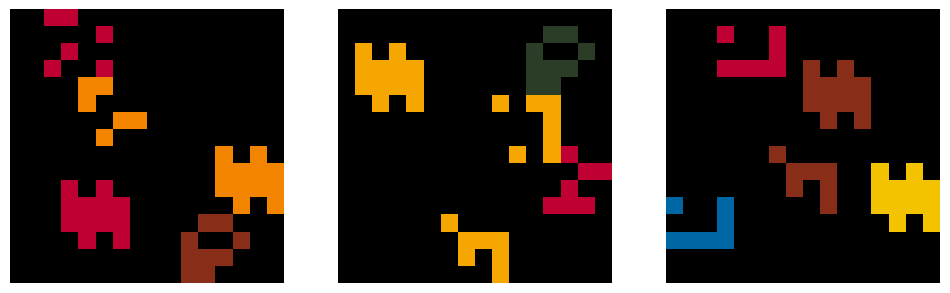

In [55]:
from texrelenv.environment import ThingMaker, Grid
from PIL import Image
import matplotlib.pyplot as plt

tm = ThingMaker()
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis("off")
    grid = Grid()
    things = [tm.thing() for _ in range(10)]
    grid.pack(things)
    plt.imshow(Image.fromarray(grid.array()))
